In [269]:
 # load liabrary
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## load dataset

In [2]:
# import csv file
dws=pd.read_csv("C:\\Users\\pc\\Downloads\\Diwali Sales Data.csv",encoding='unicode_escape')

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
# show top five data
dws.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
# dimension of combined dataset
dws.shape

(11251, 15)

In [12]:
#  statistical summary
dws.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [273]:
# statistical summary for categorical variables
dws.describe(include=np.object)


,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,1944,4289,1583,2655


In [13]:
# the info datatype and column values appear.
dws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [15]:
# delete blank columns
dws.drop(['Status','unnamed1'],axis=1,inplace=True)

In [29]:
# drop null values 
dws.dropna(inplace=True)



## Exploratory Data Analysis

  # Gender

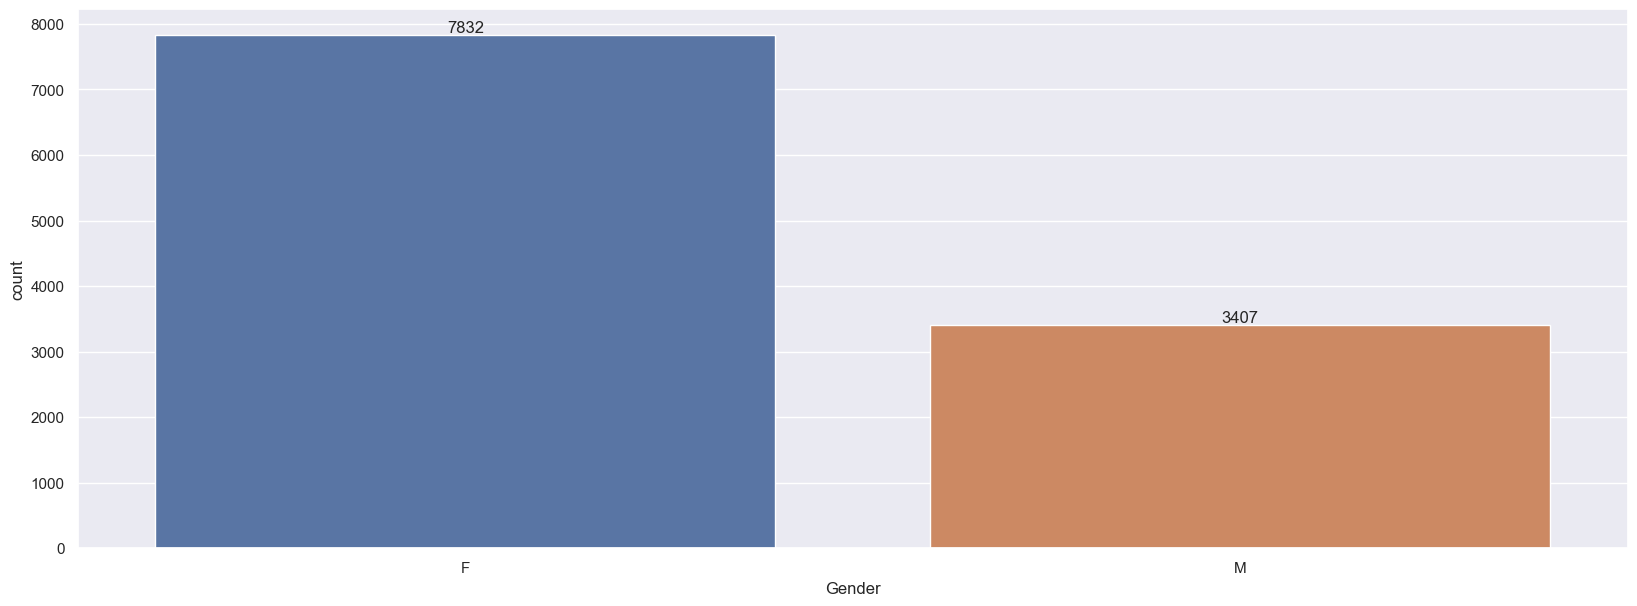

<Figure size 200x200 with 0 Axes>

In [276]:
gnd=sns.countplot(x=dws['Gender'])
plt.figure(figsize=(2,2))
gnd.bar_label(gnd.containers[0])
plt.show()


In [38]:
dws.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

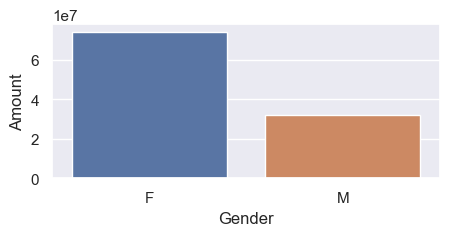

In [248]:
# plotting a bar chart for gender vs amount
gender_amount=dws.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
plt.figure(figsize=(5,2))
sns.barplot(x=gender_amount['Gender'],y=gender_amount['Amount'])


*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*



# Age

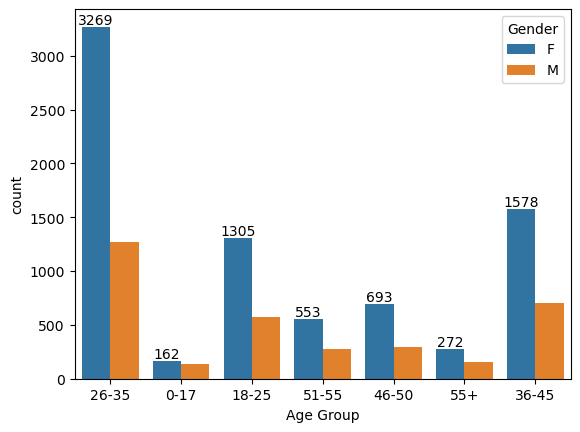

In [62]:
agp=sns.countplot(x=dws['Age Group'],hue=dws['Gender'])
agp.bar_label(agp.containers[0])
plt.show()

<Axes: xlabel='Age Group', ylabel='Amount'>

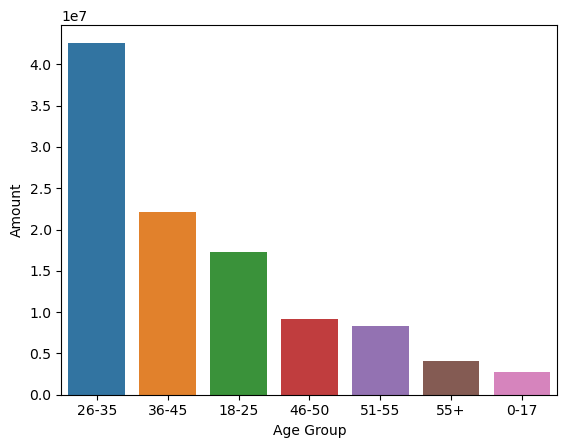

In [73]:
# Amount vs Age Group

age_amt=dws.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)

sns.barplot(x=age_amt['Age Group'],y=age_amt['Amount'])


*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

# State

<Axes: xlabel='State', ylabel='Orders'>

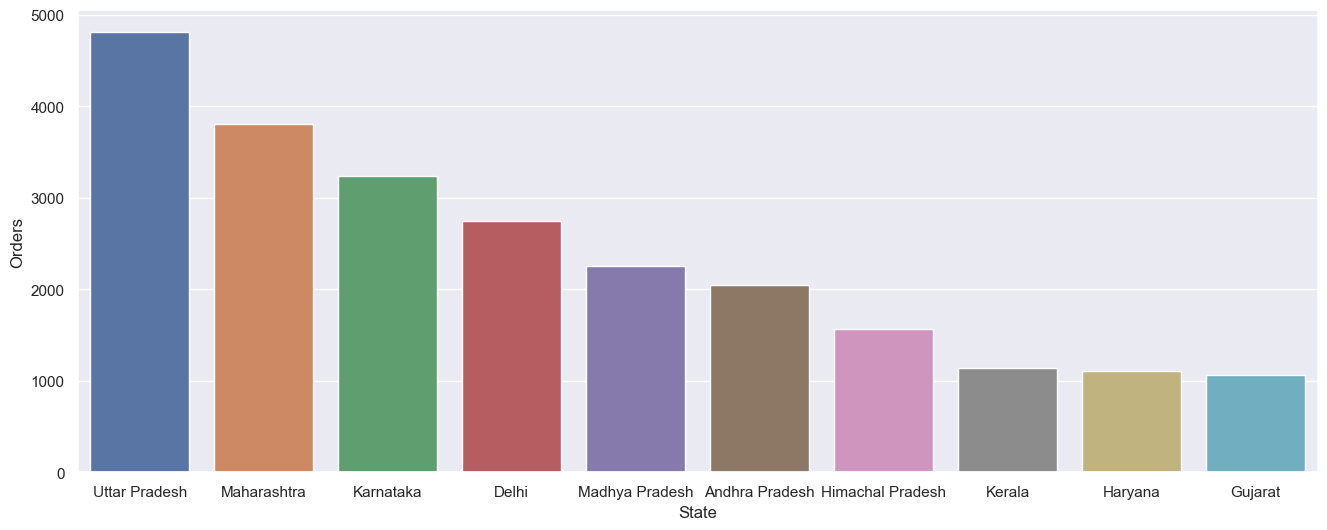

In [257]:
# total number of orders from top 10 states

state_order=dws.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)
plt.figure(figsize=(16,6))
sns.barplot(x=state_order['State'],y=state_order['Orders'])

<Axes: xlabel='State', ylabel='Amount'>

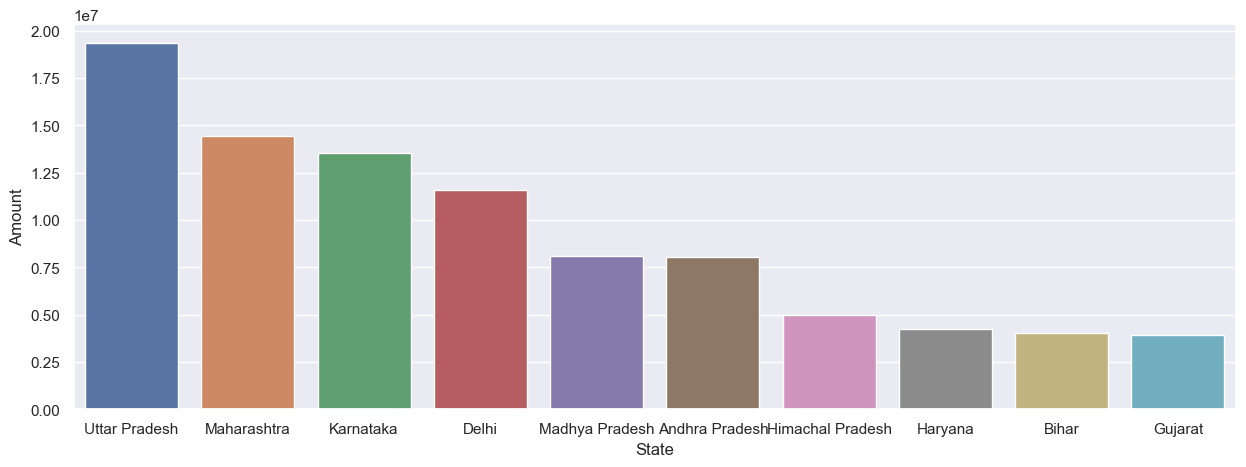

In [254]:
# total amount/sales from top 10 states

sale_state=dws.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=sale_state['State'],y=sale_state['Amount'])

*We can see from the above graph.The highest orders and highest sales amount are from Uttar Pardesh,Maharashtra and Karnataka.*

# Marital Status

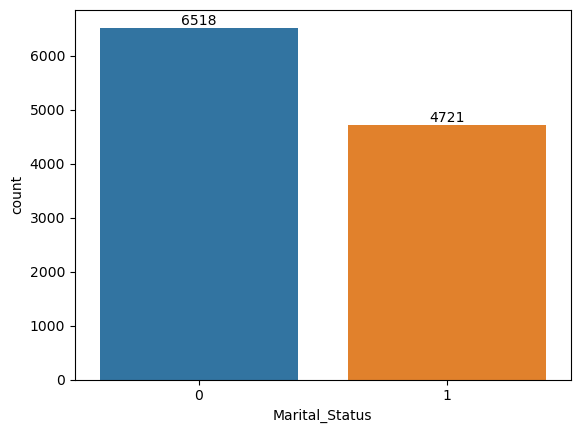

In [92]:
mtst=sns.countplot(x=dws['Marital_Status'])

mtst.bar_label(mtst.containers[0])
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Amount'>

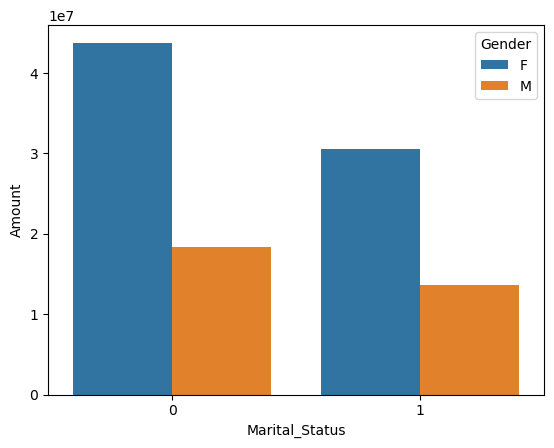

In [99]:
marital_amount=dws.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)

sns.barplot(x=marital_amount['Marital_Status'],y=marital_amount['Amount'],hue=marital_amount['Gender'])



*We can see from the above graphs.Most of the buyers are married women and their purching power is also high.*

# Occupation

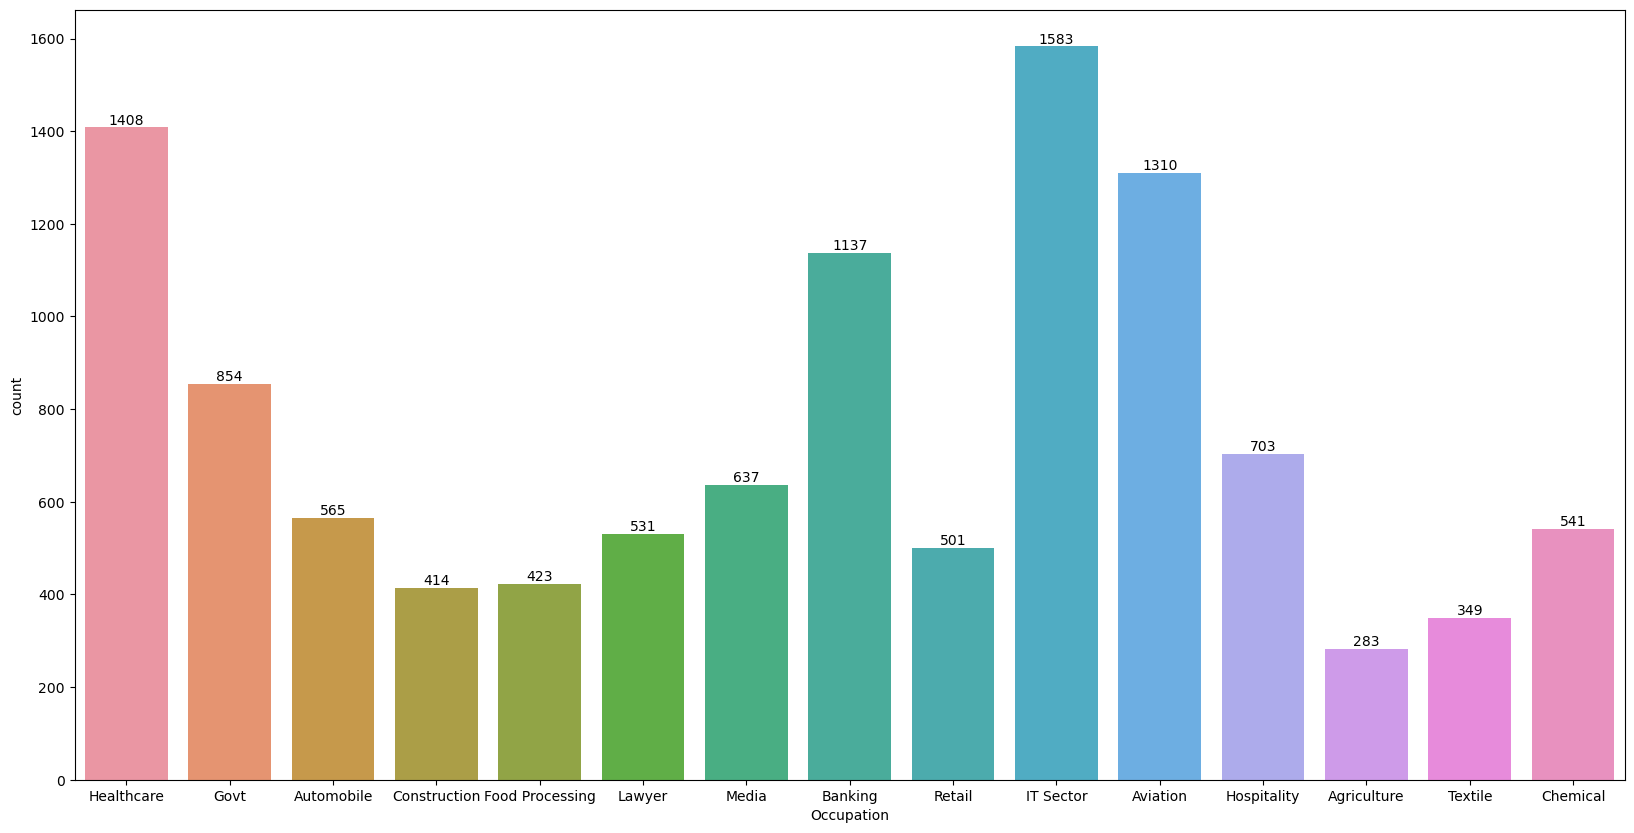

In [118]:
plt.figure(figsize=(20,10))
ocpt=sns.countplot(x=dws['Occupation'])

ocpt.bar_label(ocpt.containers[0])
plt.show()


<Axes: xlabel='Occupation', ylabel='Amount'>

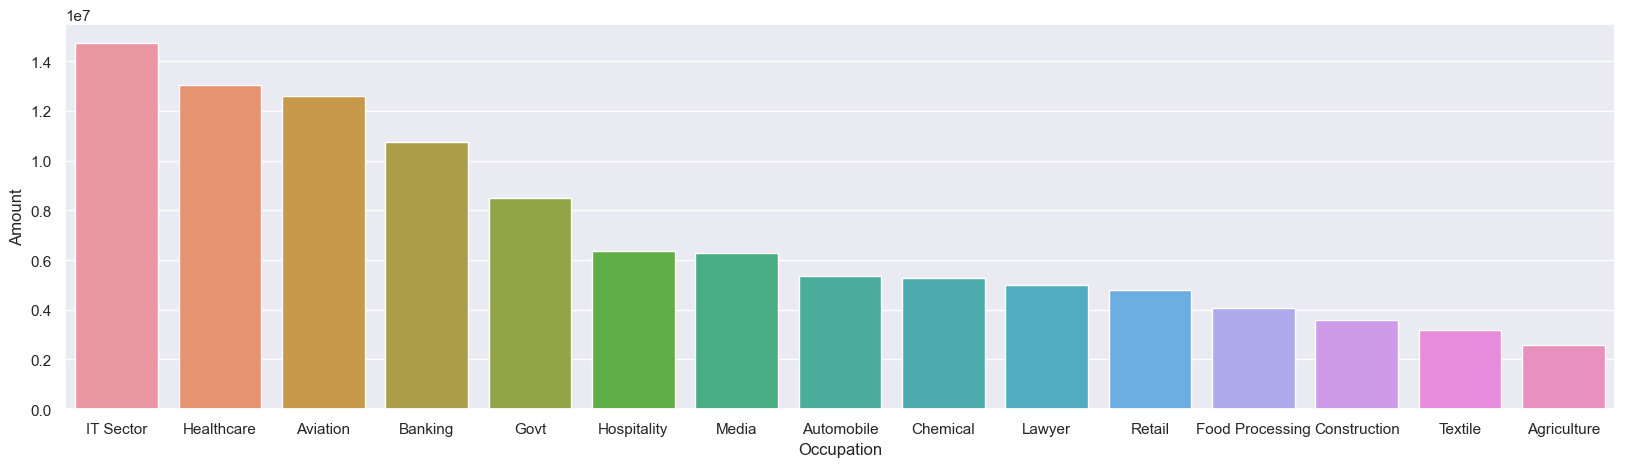

In [232]:
ocpt_amount=dws.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=ocpt_amount['Occupation'],y=ocpt_amount['Amount'])


*We can see from the above graphs.Most of the buyers are working in IT,Healthcare and Aviation sector*

# Product Category

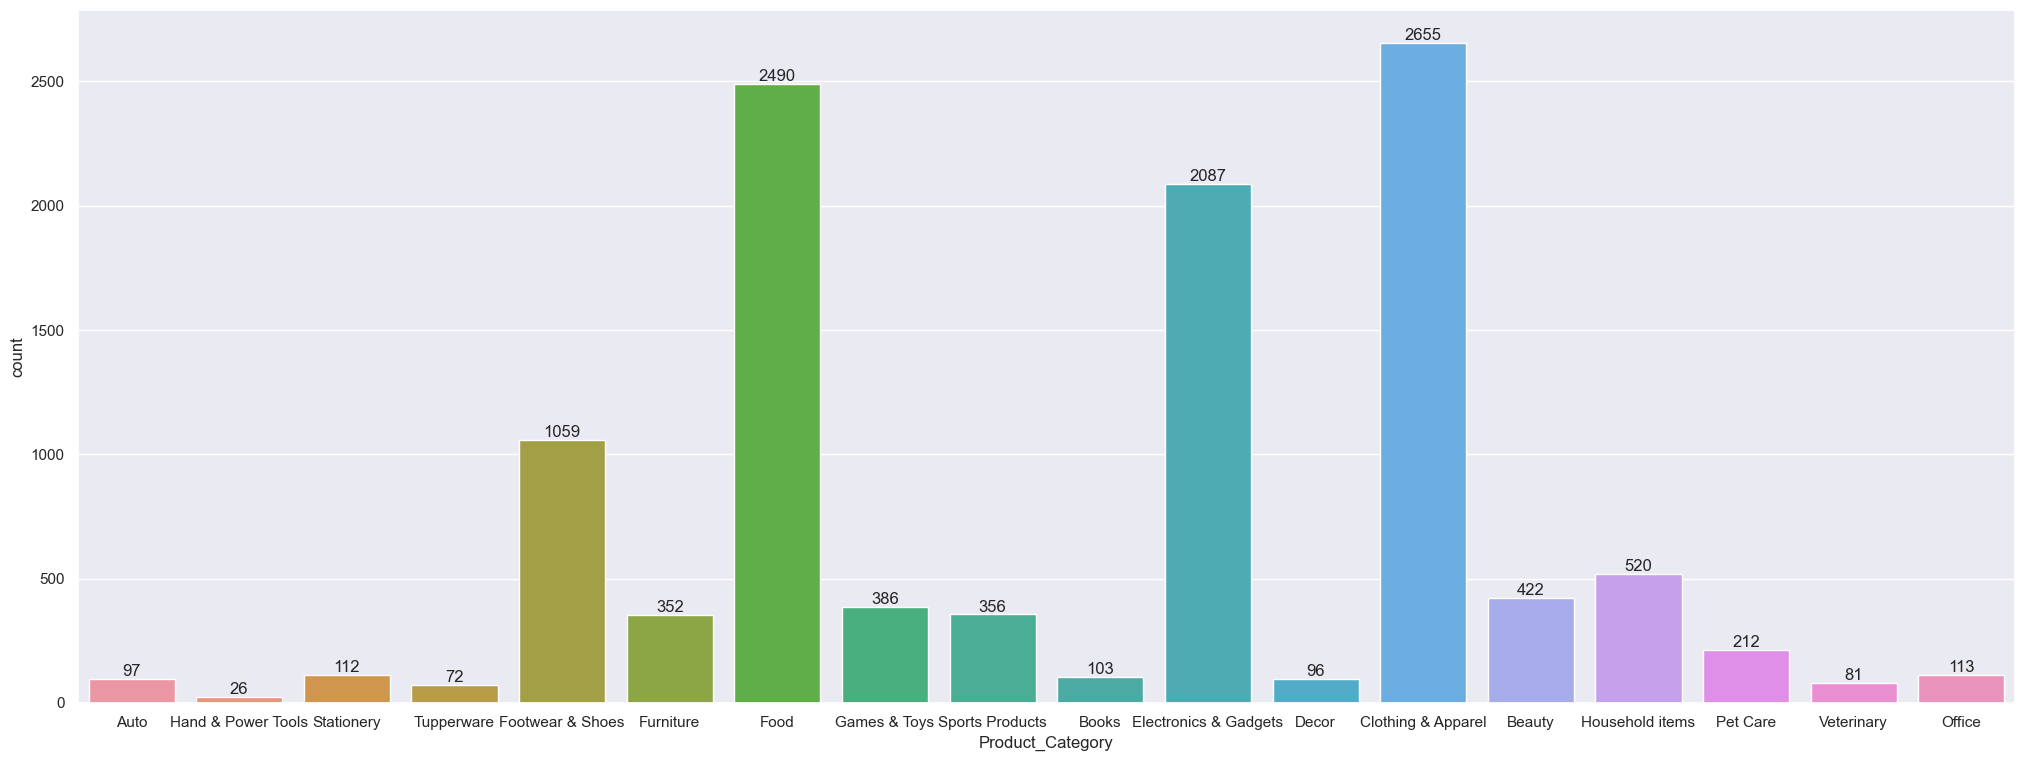

In [242]:
sns.set(rc={'figure.figsize':(25,9)})
prd=sns.countplot(x=dws['Product_Category'])

prd.bar_label(prd.containers[0])
plt.show()

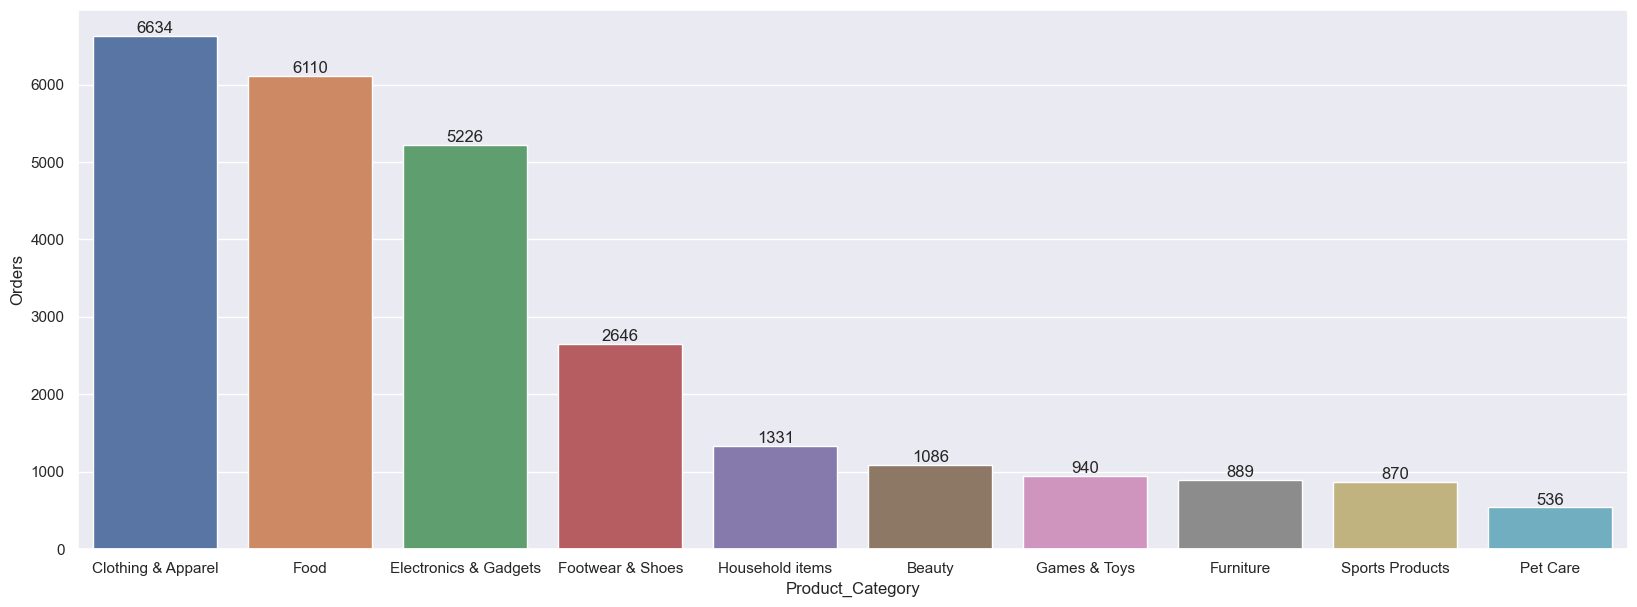

In [260]:
prd_=dws.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
f=sns.barplot(x=prd_['Product_Category'],y=prd_['Orders'])
f.bar_label(f.containers[0])
plt.show()



<Axes: xlabel='Product_Category', ylabel='Amount'>

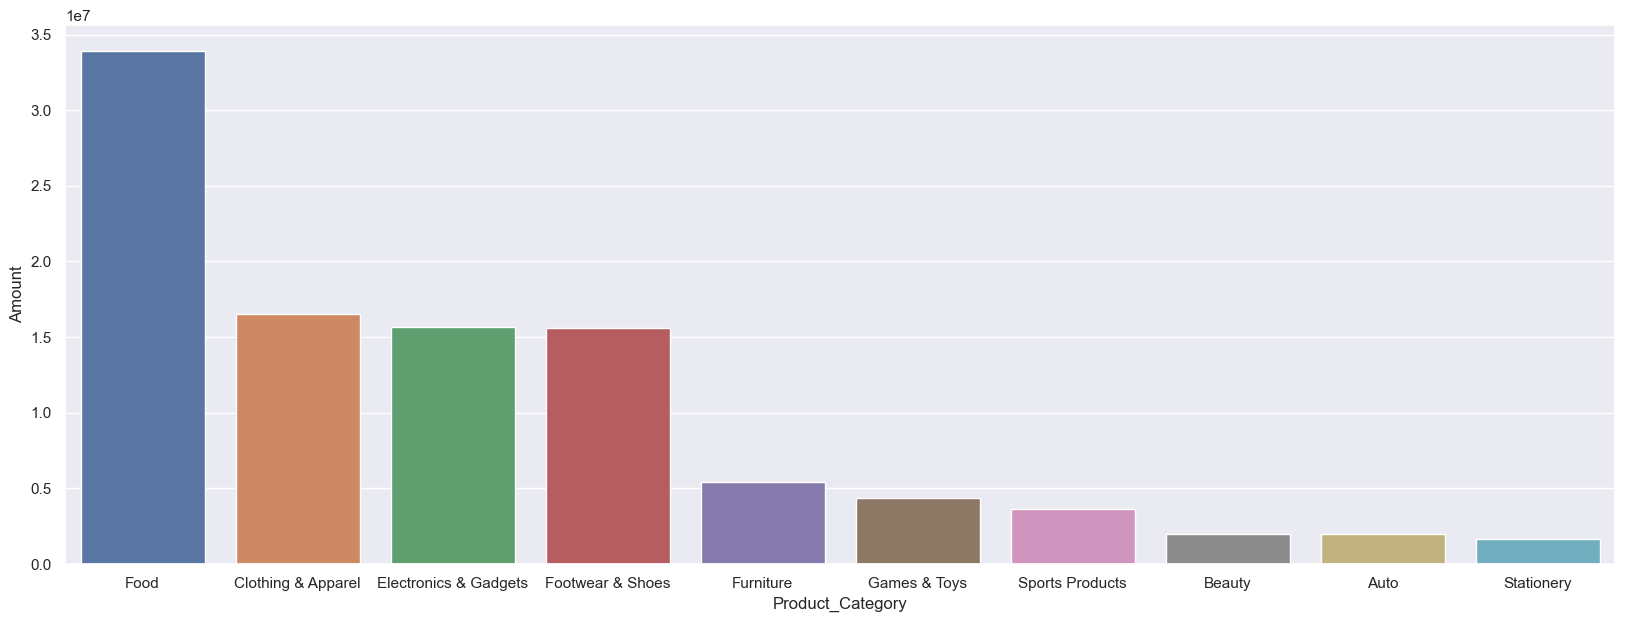

In [236]:
prd_amount=dws.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x=prd_amount['Product_Category'],y=prd_amount['Amount'])



*We can see from the above graphs.The best selling products are from Food,Clothing and Electronics categories.*

# Customer_name

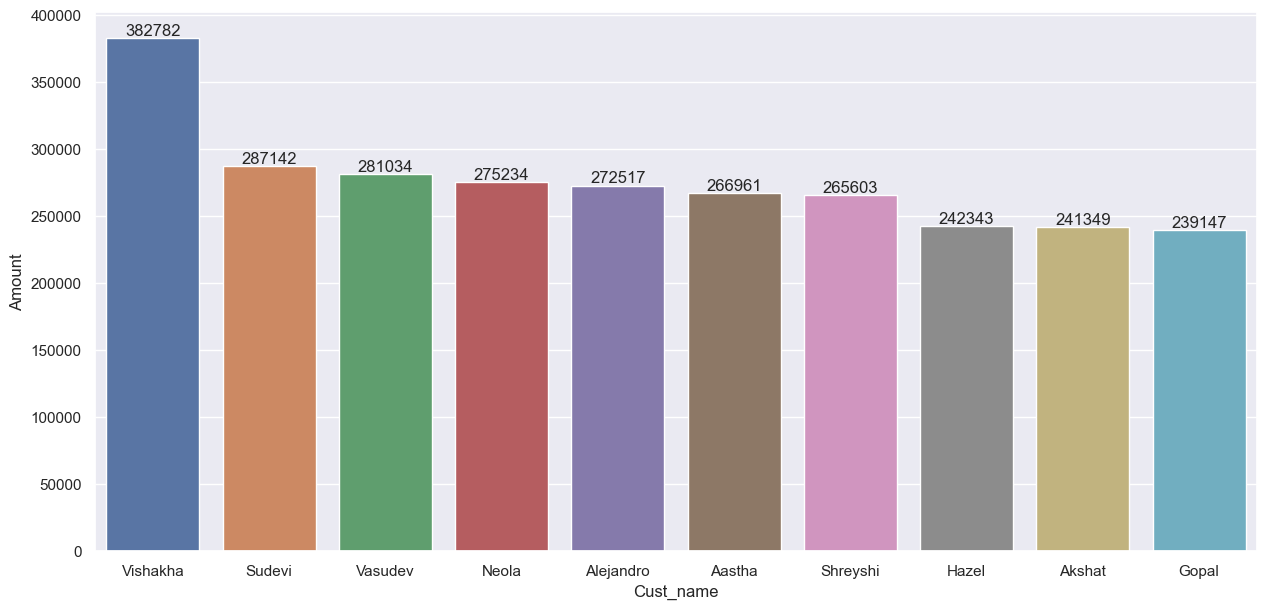

In [264]:
cust_amt=dws.groupby(['Cust_name'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)
plt.figure(figsize=(15,7))
r=sns.barplot(x=cust_amt['Cust_name'],y=cust_amt['Amount'])
r.bar_label(r.containers[0])
plt.show()

*From the above graph.We can see the names of the customers who spent the highest amount.*

# Conclusion:

*The best selling products are Food,Clothing and Electronics category.The customers who spend the highest amount in purchasing it are married women,aged 26 to 36 years.She works in IT,Healthcare and Aviation in UP,Maharashtra and Karnataka.*